In [23]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv("placement.csv")

In [25]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [26]:
df.shape

(100, 4)

In [27]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [28]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [29]:
df = df.iloc[:,1:]

In [30]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [31]:
df.shape

(100, 3)

# EDE

In [32]:
import matplotlib.pyplot as plt

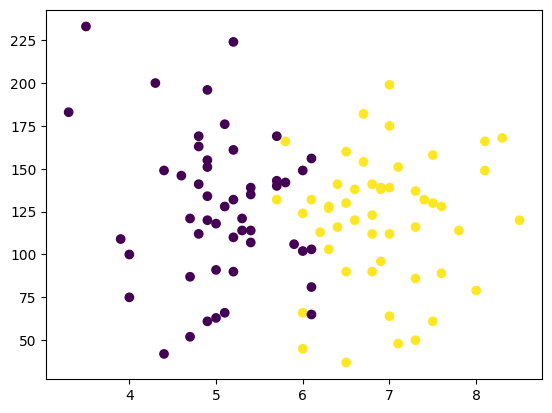

In [33]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.show()

In [36]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [42]:
X_train, y_train

(    cgpa     iq
 55   7.8  114.0
 88   4.4  149.0
 26   7.0  199.0
 42   7.6   89.0
 69   8.5  120.0
 ..   ...    ...
 60   6.9  139.0
 71   6.1  132.0
 14   6.1  103.0
 92   5.2  110.0
 51   4.8  141.0
 
 [80 rows x 2 columns],
 55    1
 88    0
 26    1
 42    1
 69    1
      ..
 60    1
 71    1
 14    0
 92    0
 51    0
 Name: placement, Length: 80, dtype: int64)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [50]:
X_train = scaler.fit_transform(X_train)

In [51]:
X_train

array([[ 1.64027754, -0.29911792],
       [-1.44090679,  0.59472432],
       [ 0.91529299,  1.87164179],
       [ 1.4590314 , -0.93757666],
       [ 2.27463902, -0.14588782],
       [-0.80654531,  1.28425975],
       [-0.98779145,  0.21164907],
       [-1.44090679, -2.13787909],
       [-0.80654531, -1.5249587 ],
       [ 1.1871622 , -0.24804122],
       [ 0.82466992,  0.31380247],
       [-0.71592224,  0.90118451],
       [-0.17218383,  1.02887626],
       [-0.71592224, -0.91203831],
       [ 0.73404686, -0.35019462],
       [ 1.00591606, -1.98464899],
       [ 0.82466992, -0.75880821],
       [ 1.91214675,  1.02887626],
       [ 0.73404686, -0.91203831],
       [-0.71592224,  2.51010053],
       [-0.5346761 ,  0.23718742],
       [-1.07841452,  0.95226121],
       [-0.89716838, -1.60157375],
       [-1.53152986,  1.89718014],
       [ 0.00906231, -0.04373442],
       [-0.71592224,  0.16057237],
       [-0.5346761 , -0.47788637],
       [-0.89716838, -0.88649996],
       [ 0.00906231,

In [52]:
X_test = scaler.transform(X_test)

In [53]:
X_test

array([[ 1.36840833,  0.10949567],
       [ 2.09339288,  1.07995296],
       [ 0.28093151,  0.03288063],
       [ 0.00906231, -1.5249587 ],
       [ 1.36840833, -1.65265045],
       [-1.25966065,  0.51810927],
       [-0.98779145, -0.14588782],
       [-0.98779145,  1.79502675],
       [ 0.00906231, -2.06126404],
       [ 0.73404686, -0.06927277],
       [-1.80339906, -0.65665481],
       [ 1.4590314 ,  0.05841897],
       [-0.98779145, -1.65265045],
       [ 0.00906231,  0.59472432],
       [ 1.1871622 , -1.01419171],
       [-0.17218383,  0.41595587],
       [-0.98779145,  0.74795441],
       [ 1.1871622 , -1.93357229],
       [-0.5346761 ,  0.33934082],
       [-1.89402213, -0.42680967]])

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
clf = LogisticRegression()

In [57]:
# model training
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
y_pred = clf.predict(X_test)

In [61]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [59]:
y_test

83    1
53    1
70    1
45    1
44    1
39    0
22    0
80    0
10    1
0     1
18    0
30    1
73    0
33    0
90    1
4     0
76    0
77    1
12    0
31    0
Name: placement, dtype: int64

In [62]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test, y_pred) * 100

85.0

In [69]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [72]:
from mlxtend.plotting import plot_decision_regions 

In [76]:
from sklearn.svm import SVC

<Axes: >

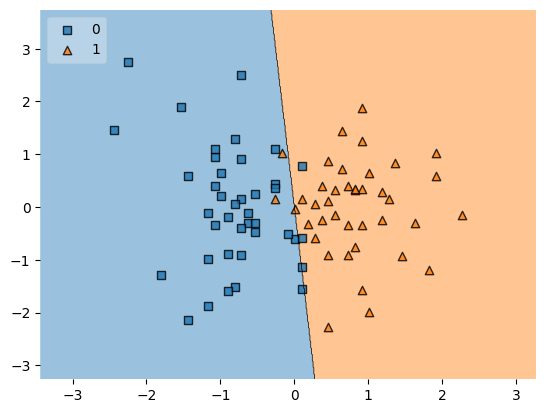

In [80]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [81]:
import pickle

In [82]:
pickle.dump(clf,open('model.pkl','wb'))